Iteration:  0
Predictions: [9 9 2 ... 9 2 9], True Labels: [4 2 2 ... 7 2 8]
Accuracy: 0.1219
-----------------------------------------
Iteration:  10
Predictions: [6 2 2 ... 4 2 6], True Labels: [4 2 2 ... 7 2 8]
Accuracy: 0.1756
-----------------------------------------
Iteration:  20
Predictions: [6 2 2 ... 4 2 6], True Labels: [4 2 2 ... 7 2 8]
Accuracy: 0.2599
-----------------------------------------
Iteration:  30
Predictions: [6 2 2 ... 4 2 6], True Labels: [4 2 2 ... 7 2 8]
Accuracy: 0.3398
-----------------------------------------
Iteration:  40
Predictions: [6 2 2 ... 7 2 6], True Labels: [4 2 2 ... 7 2 8]
Accuracy: 0.3903
-----------------------------------------
Iteration:  50
Predictions: [2 2 2 ... 7 2 6], True Labels: [4 2 2 ... 7 2 8]
Accuracy: 0.4263
-----------------------------------------
Iteration:  60
Predictions: [2 2 2 ... 7 2 6], True Labels: [4 2 2 ... 7 2 8]
Accuracy: 0.462
-----------------------------------------
Iteration:  70
Predictions: [8 2 2 ... 7 2 

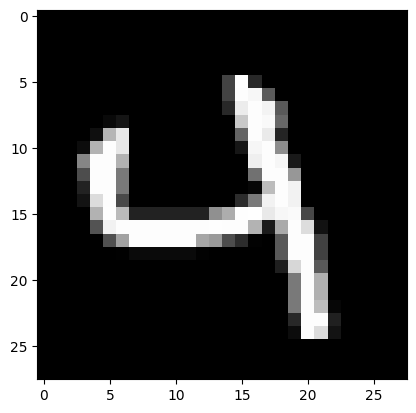

Prediction:  [2]
Actual Label:  2


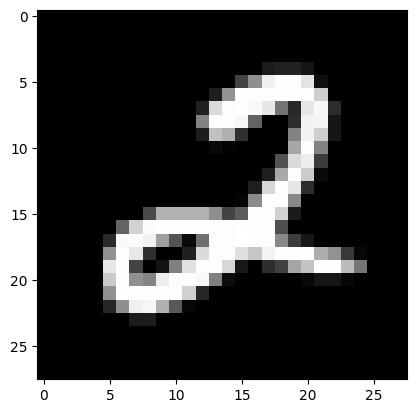

Prediction:  [2]
Actual Label:  2


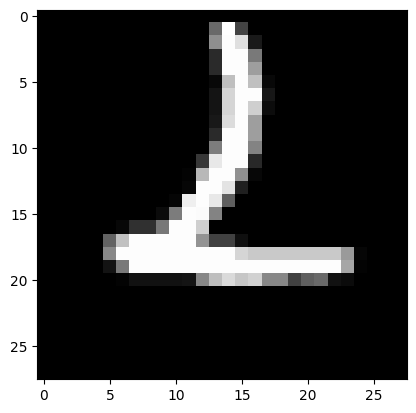

Prediction:  [4]
Actual Label:  4


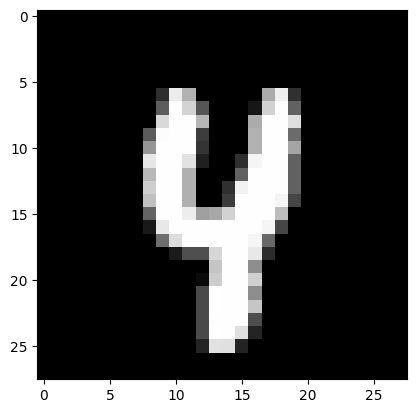

Prediction:  [3]
Actual Label:  3


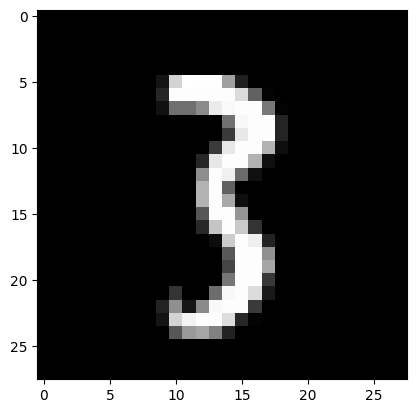

Prediction:  [6]
Actual Label:  6


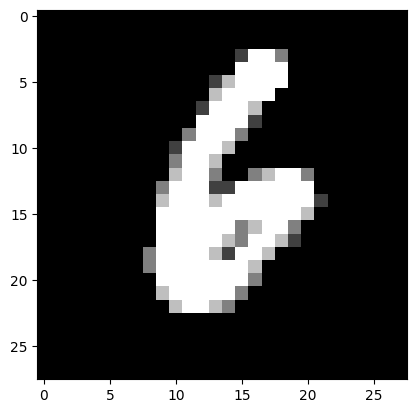

Prediction:  [2]
Actual Label:  2


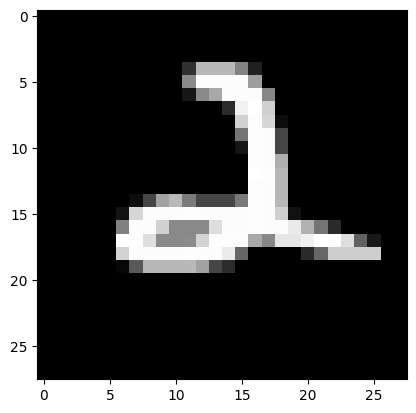

Prediction:  [6]
Actual Label:  6


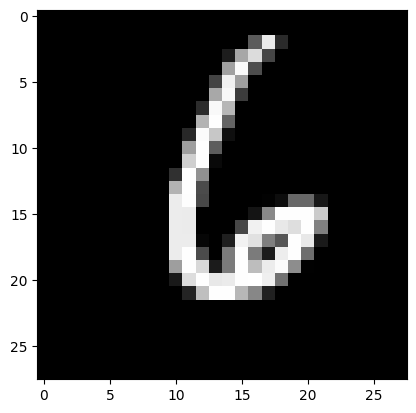

Prediction:  [0]
Actual Label:  0


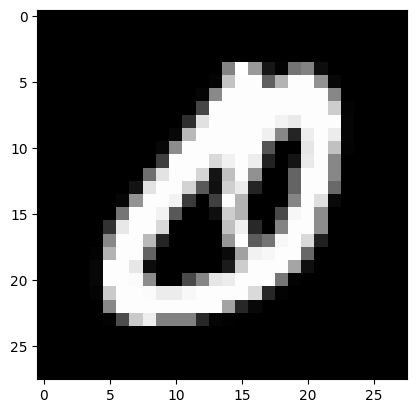

Prediction:  [1]
Actual Label:  1


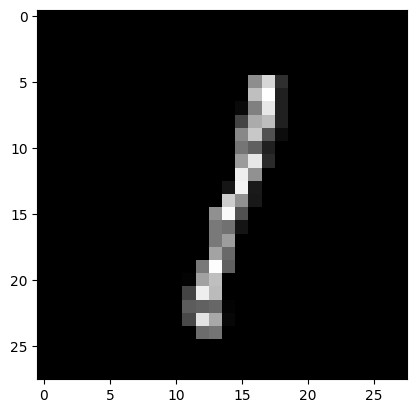

Prediction:  [0]
Actual Label:  0


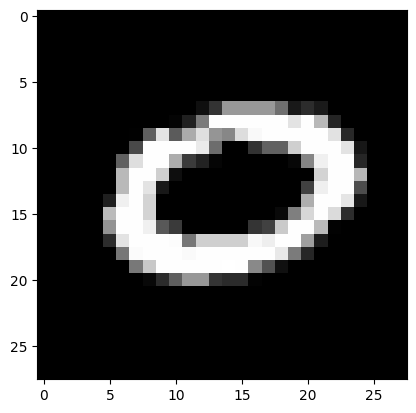

Predictions: [0 3 9 2 8 9 7 7 2 1 9 8 1 0 1 7 3 6 5 8 6 7 7 5 1 6 4 0 0 7 0 5 4 0 7 3 7
 8 7 0 5 2 4 8 3 3 0 4 2 6 1 3 5 6 3 9 6 9 2 0 8 7 6 1 9 8 5 4 7 2 2 4 5 4
 4 7 4 0 0 5 8 8 0 0 1 1 5 8 3 5 9 3 4 3 8 1 0 7 9 3 2 1 4 8 2 6 8 7 9 1 6
 1 6 2 8 2 0 5 0 8 5 5 4 7 0 9 2 1 2 8 6 3 0 5 7 1 0 8 5 1 6 9 7 7 0 2 7 0
 1 7 7 2 8 4 5 7 5 1 0 8 6 1 8 7 1 0 8 6 4 9 4 4 2 4 9 0 6 6 3 1 4 7 9 3 3
 1 7 1 9 5 1 3 6 0 6 5 0 9 5 5 1 1 6 8 9 3 7 2 9 9 2 5 6 7 2 0 5 3 9 7 4 2
 4 8 6 4 6 7 3 4 0 7 2 0 4 0 2 7 2 4 4 6 8 7 8 4 3 1 1 0 4 5 3 1 3 5 2 8 2
 1 9 8 4 4 2 2 9 1 9 3 0 8 8 7 8 7 3 5 4 6 4 3 9 1 4 4 0 3 8 0 4 5 0 3 4 9
 1 5 8 5 2 3 4 3 8 6 2 9 1 8 7 0 4 6 6 3 8 1 9 2 4 3 1 2 0 4 1 5 9 5 8 4 6
 0 8 3 0 3 2 2 8 5 5 0 1 8 5 7 9 8 2 6 8 4 4 7 6 6 2 7 5 4 2 5 1 4 8 3 2 3
 7 4 5 8 7 0 2 1 2 5 1 5 3 8 1 3 6 3 8 5 4 5 1 0 9 8 6 3 2 4 3 9 8 4 1 2 2
 3 5 4 5 7 4 1 2 8 1 6 9 4 8 5 4 3 2 2 1 4 6 7 8 4 1 9 4 9 8 2 7 2 4 7 0 1
 8 5 7 6 3 2 4 7 6 5 9 7 7 7 1 7 7 0 7 5 7 5 1 9 2 7 7 3 2 4 1 1 8 7 3 5 2
 1 8 7 0 2 6

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load the training dataset
dataset = pd.read_csv('data/train.csv')

# Convert the dataset into a numpy array
dataset = np.array(dataset)
num_examples, num_features = dataset.shape

# Shuffle the dataset to ensure randomness before splitting
np.random.shuffle(dataset)

# ------------------------------------------------------------
# Separate the first 1000 examples as the validation set and transpose for convenience
dataset_val = dataset[0:1000].T
# After transposing, each column corresponds to a digit image, with 784 rows representing pixel values

# Extract labels (digits) and features (pixels) for the validation set
labels_val = dataset_val[0]  # The actual digits are stored in the first row
features_val = dataset_val[1:num_features]  # Pixel values start from the second row
features_val = features_val / 255.  # Normalize pixel values

# ------------------------------------------------------------
# Use the remaining examples as the training set and transpose for convenience
dataset_train = dataset[1000:num_examples].T
labels_train = dataset_train[0]  # Actual digits
features_train = dataset_train[1:num_features]  # Pixel values
features_train = features_train / 255.  # Normalize pixel values

_, num_train = features_train.shape

# ------------------------------------------------------------
# Neural network with a two-layer architecture:
# - Input layer (A^0) has 784 units corresponding to the 784 pixels in each 28x28 input image.
# - Hidden layer (A^1) has 10 units with ReLU activation.
# - Output layer (A^2) has 10 units for the ten digit classes with softmax activation.

def initialize_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2
# Initialize weights and biases with small random values in the range (-0.5, 0.5)

def relu_activation(Z):
    return np.maximum(Z, 0)
# Apply ReLU activation function element-wise to the input matrix Z

def softmax_activation(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
# Apply softmax function to convert logits into probabilities for classification

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu_activation(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax_activation(Z2)
    return Z1, A1, Z2, A2
# Perform forward propagation through the network

def relu_derivative(Z):
    return Z > 0
# Compute the derivative of ReLU activation function

def convert_to_one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
# Convert labels into one-hot encoded format for output comparison

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = convert_to_one_hot(Y)
    dZ2 = A2 - one_hot_Y  # Compute the error at the output layer
    dW2 = 1 / num_train * dZ2.dot(A1.T)
    db2 = 1 / num_train * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relu_derivative(Z1)
    dW1 = 1 / num_train * dZ1.dot(X.T)
    db1 = 1 / num_train * np.sum(dZ1)
    return dW1, db1, dW2, db2
# Perform backward propagation to compute gradients

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1    
    W2 = W2 - learning_rate * dW2  
    b2 = b2 - learning_rate * db2    
    return W1, b1, W2, b2
# Update the weights and biases using the computed gradients

# -------------------------------------------------------------------
def predict(A2):
    return np.argmax(A2, 0)
# Generate predictions based on the highest probability in the output layer

def compute_accuracy(predictions, Y):
    print(f"Predictions: {predictions}, True Labels: {Y}")
    return np.sum(predictions == Y) / Y.size
# Calculate the accuracy of the model by comparing predictions with actual labels

def gradient_descent(X, Y, learning_rate, iterations):
    W1, b1, W2, b2 = initialize_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = predict(A2)
            accuracy = compute_accuracy(predictions, Y)
            print(f"Accuracy: {round(accuracy, 4)}")
            print("-----------------------------------------")
    return W1, b1, W2, b2
# Train the neural network using gradient descent and output accuracy every 10 iterations

# -------------------------------------------------------------------
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = predict(A2)
    return predictions
# Generate predictions using the trained model

def visualize_prediction(index, W1, b1, W2, b2):
    image = features_train[:, index, None]
    prediction = make_predictions(features_train[:, index, None], W1, b1, W2, b2)
    label = labels_train[index]
    print("Prediction: ", prediction)
    print("Actual Label: ", label)
    
    image = image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()
# Visualize a single prediction along with its corresponding image

W1, b1, W2, b2 = gradient_descent(features_train, labels_train, 0.1, 1000) 

visualize_prediction(0, W1, b1, W2, b2)
visualize_prediction(1, W1, b1, W2, b2)
visualize_prediction(2, W1, b1, W2, b2)
visualize_prediction(3, W1, b1, W2, b2)
visualize_prediction(4, W1, b1, W2, b2)
visualize_prediction(5, W1, b1, W2, b2)
visualize_prediction(6, W1, b1, W2, b2)
visualize_prediction(7, W1, b1, W2, b2)
visualize_prediction(8, W1, b1, W2, b2)
visualize_prediction(101, W1, b1, W2, b2)
visualize_prediction(106, W1, b1, W2, b2)

# Finally, let's find the accuracy on the validation set:
val_predictions = make_predictions(features_val, W1, b1, W2, b2)
val_accuracy = compute_accuracy(val_predictions, labels_val)
print(f"Validation Set Accuracy: {val_accuracy}")


In [18]:
import tkinter as tk
import numpy as np
from PIL import Image, ImageDraw
import PIL

# Initialize global variables for the canvas
width = 280  # Width of the canvas
height = 280  # Height of the canvas
white = (255, 255, 255)
black = (0, 0, 0)
image1 = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(image1)

# Neural network functions and training code (imported or defined above)
# Assuming W1, b1, W2, b2 are the trained weights and biases from your neural network

# Initialize tkinter
root = tk.Tk()
root.title("Draw a Digit")

# Create a tkinter canvas
canvas = tk.Canvas(root, width=width, height=height, bg="white")
canvas.pack()

def paint(event):
    # Draw a line on the canvas
    x1, y1 = (event.x - 6), (event.y - 6)
    x2, y2 = (event.x + 6), (event.y + 6)
    canvas.create_oval(x1, y1, x2, y2, fill="black", width=10)
    draw.line([x1, y1, x2, y2], fill="black", width=10)

def clear_canvas():
    global image1, draw
    canvas.delete("all")
    image1 = PIL.Image.new("RGB", (width, height), white)
    draw = ImageDraw.Draw(image1)

def predict_digit():
    # Convert the canvas drawing to a 28x28 grayscale image
    image1_resized = image1.resize((28, 28), PIL.Image.ANTIALIAS).convert("L")
    
    # Convert the grayscale image to a numpy array
    image1_array = np.array(image1_resized)
    
    # Map white pixels to 0 and black pixels to 1
    image1_array = np.where(image1_array < 128, 1, 0)  # Threshold at 128 for binarization
    
    print(image1_array)  # Print the 28x28 grid
    
    # Reshape the image to match the input shape of the neural network
    image1_flattened = image1_array.reshape(784, 1)

    # Predict the digit using the trained neural network
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, image1_flattened)
    prediction = predict(A2)
    print("Predicted Digit:", prediction[0])

# Bind the paint function to the left mouse button
canvas.bind("<B1-Motion>", paint)

# Add buttons to the tkinter window
button_frame = tk.Frame(root)
button_frame.pack()

clear_button = tk.Button(button_frame, text="Clear", command=clear_canvas)
clear_button.grid(row=0, column=0)

predict_button = tk.Button(button_frame, text="Predict", command=predict_digit)
predict_button.grid(row=0, column=1)

# Run the tkinter main loop
root.mainloop()


C:\Users\aniru\AppData\Local\Temp\ipykernel_25420\2338096970.py:40: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image1_resized = image1.resize((28, 28), PIL.Image.ANTIALIAS).convert("L")


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 